# FPGheArt - Week 5 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653


Lavoro:
* Prova con due nodi
* Prova con beta diversi e in posizioni diverse (positive phase o no)
* Controllare il bit correction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q=0.1
fname = "DATA/dataRBM_q" + str(q) + ".csv"
v = np.loadtxt(fname, delimiter=",", dtype = int)
N = len(v)
L = len(v[0])
print(f"each of N={N} data samples has L={L} digits")
for n in range(10):
    print(v[n])
print("...")

SPINS = True
if SPINS:
    vmin = -1
    GAP = 2
    v = 2*v - 1
else:
    vmin = 0
    GAP = 1
    
#store initial values
v0 = v

for n in range(10):
    print(v[n])
print("...")

each of N=10000 data samples has L=8 digits
[0 1 0 0 1 0 1 1]
[1 1 0 1 1 0 0 1]
[0 1 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0]
[1 1 0 0 1 0 0 0]
[0 1 1 0 1 1 0 0]
[1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1]
[1 0 0 0 0 0 1 0]
...
[-1  1 -1 -1  1 -1  1  1]
[ 1  1 -1  1  1 -1 -1  1]
[-1  1  1  1 -1 -1  1  1]
[-1 -1  1  1  1  1 -1 -1]
[-1 -1  1  1 -1 -1  1 -1]
[ 1  1 -1 -1  1 -1 -1 -1]
[-1  1  1 -1  1  1 -1 -1]
[ 1  1 -1 -1 -1 -1  1  1]
[ 1 -1 -1  1  1  1 -1  1]
[ 1 -1 -1 -1 -1 -1  1 -1]
...


In [3]:
#number of hidden unit
M = 3
sigma = np.sqrt(4./float(L+M))
np.random.seed(12345)
w = sigma * (2*np.random.rand(L,M) - 1)
a = sigma * (2*np.random.rand(L) - 1)
b = np.zeros(M)
print("w =\n", w)
print("\na =\n", a)
print("\nb =\n", b)
w0, a0, b0 = w, a, b

w =
 [[ 0.5181365  -0.22145941 -0.38120826]
 [-0.35631371  0.08167946  0.11523125]
 [ 0.56022559  0.18473853  0.3001927 ]
 [ 0.18521223  0.2987553   0.55635686]
 [-0.59290602 -0.47464594 -0.24277246]
 [ 0.18863898  0.373648    0.44886104]
 [ 0.56038609  0.26977468  0.17183171]
 [ 0.26225893 -0.03907707 -0.21035279]]

a =
 [-0.07279134  0.27701546  0.59580401  0.21331772  0.35074515 -0.39689234
 -0.57064124  0.36226014]

b =
 [0. 0. 0.]


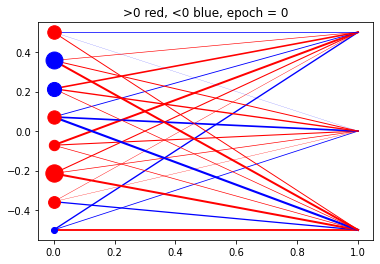

In [4]:
def create_coord(np, x0):
    x = [x0] * np
    y = list(range(np))
    for i in range(np):
        y[i] = y[i]/(np-1.) - 0.5
    return (x, y)

(x1, y1) = create_coord(L, 0)
(x2, y2) = create_coord(M, 1)

def mycolor(val):
    if val > 0:
        return 'red'
    elif val < 0:
        return 'blue'
    return 'black'

def plotgraph(epoch=0):
    A = 2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i], x2[j]), (y1[i], y2[j]), mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder = 1, lw=A*np.abs(w[i][j]))
    A = 300./(a.max() + b.max())
    for i in range(L):
        plt.scatter(x1[i], y1[i], s = A*np.abs(a[i]), zorder = 2, c = mycolor(a[i]))
    for j in range(M):
        plt.scatter(x2[j], y2[j], s = A*np.abs(b[j]), zorder = 2, c = mycolor(b[j]))
    plt.title(f">0 red, <0 blue, epoch = {epoch}")
    plt.show()

plotgraph()

In [5]:
def activate(v_in, wei, bias, DE, beta = 1, info = False):
    act = np.dot(v_in, wei) + bias
    prob = 1./(1.+np.exp(-beta*DE*act))
    n = len(act)
    v_out = np.full(n, vmin)
    v_out[np.random.random_sample(n) < prob] = 1
    if info:
        print("input =\n", v_in)
        print("act =\n", act)
        print("prob = \n", prob)
        print("out = \n", v_out)
    return v_out

activate(v[0], w, b, GAP, info = True)

input =
 [-1  1 -1 -1  1 -1  1  1]
act =
 [-1.57878802 -0.79795129 -1.09026463]
prob = 
 [0.0407938  0.16855507 0.10151264]
out = 
 [-1  1 -1]


array([-1,  1, -1])

---- epoch = 1  n= 499  m= 500
dw= [[-0.26  -0.06   0.216]
 [-0.156  0.1    0.136]
 [ 0.192 -0.072 -0.188]
 [ 0.108 -0.068 -0.152]
 [-0.036 -0.276  0.08 ]
 [ 0.076 -0.228 -0.032]
 [ 0.04   0.28  -0.068]
 [-0.036  0.276 -0.048]]
da= [-0.032 -0.032  0.036  0.008 -0.112 -0.12   0.004  0.016]
db= [ 0.02  -0.004 -0.032]
---- epoch = 2  n= 499  m= 500
dw= [[ 0.29333333 -0.25904762 -0.07619048]
 [ 0.37333333 -0.33142857 -0.07238095]
 [-0.37714286  0.3047619   0.05333333]
 [-0.45714286  0.33142857  0.10285714]
 [ 0.00761905  0.05714286  0.33904762]
 [ 0.02666667  0.11428571  0.39619048]
 [-0.01142857 -0.11428571 -0.40380952]
 [-0.08761905 -0.12952381 -0.38857143]]
da= [-0.00761905 -0.05714286 -0.06095238 -0.00380952  0.01142857 -0.06095238
  0.09904762  0.1752381 ]
db= [-0.11047619 -0.08380952  0.02285714]


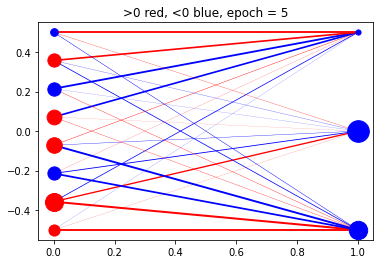

l_rate =  0.7999999999999998


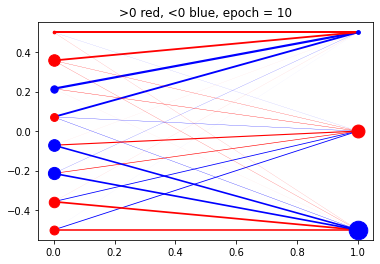

l_rate =  0.6666666666666663


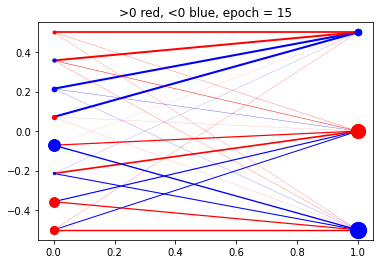

l_rate =  0.5714285714285713


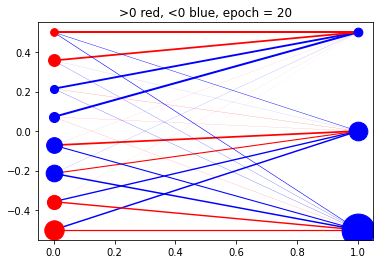

l_rate =  0.5


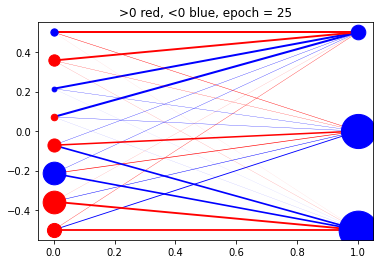

l_rate =  0.4444444444444445


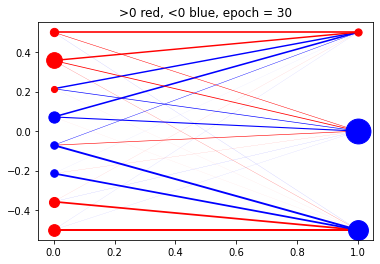

l_rate =  0.4000000000000001


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

l_rate =  0.3636363636363637


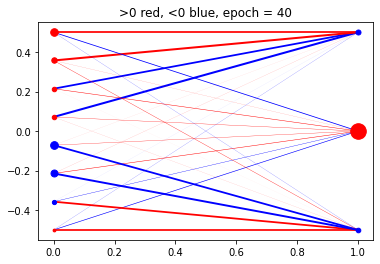

l_rate =  0.3333333333333335


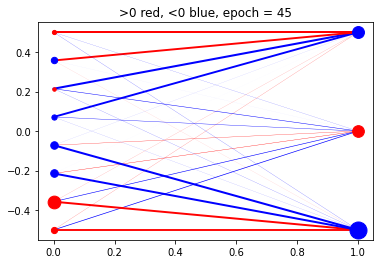

l_rate =  0.3076923076923079


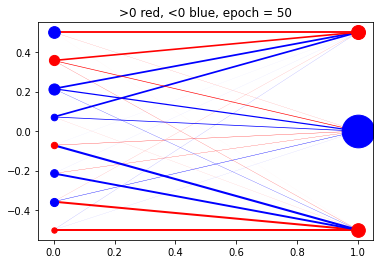

l_rate =  0.28571428571428586


In [14]:
np.random.seed(12)

l_rate = 1.0
#minibatches
mini, m = 500, 0
#epochs 
nepoch = 50
beta = 2

for epoch in range(1, 1+nepoch):
    for n in range(N):
        if m==0:
            #initialize
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L,M)), np.zeros((L, M))
        
        #positive CD phase
        h = activate(v[n], w, b, GAP)
        #negative CD phase
        vf = activate(h, w.T, a, GAP, beta)
        # positive CD pahse nr 2
        hf = activate(vf, w, b, GAP)
        
        v_data += v[n]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[n].T, h)
        vh_model += np.outer(vf.T, hf)
        
        m+=1
        
        if m == mini:
            C = l_rate/mini
            dw = C*(vh_data-vh_model)
            da = C*(v_data-v_model)
            db = C*(h_data-h_model)
            if epoch<=2 and n<=mini:
                print("---- epoch =", epoch, " n=", n, " m=", m)
                print("dw=", dw)
                print("da=", da)
                print("db=", db)
            w += dw
            a += da
            b += db
            m = 0
    #randomize order
    np.random.shuffle(v)
    l_rate = l_rate/(0.05*l_rate + 1)
    if epoch%5 == 0:
        plotgraph(epoch)
        print("l_rate = ", l_rate)

In [10]:
print("w0 =\n", w0)
print("w = \n", w)
print("a0 =\n", a0)
print("a = \n", a)
print("b0 =\n", b0)
print("b = \n", b)

w0 =
 [[ 0.0027224   0.29437242 -0.18647658]
 [-0.01738404  0.3678933  -0.1007199 ]
 [-0.00619647 -0.38289444  0.03485521]
 [ 0.01581343 -0.34536883  0.07931573]
 [ 0.35606598  0.01583696 -0.0007227 ]
 [ 0.34559407 -0.0140247   0.02952846]
 [-0.36706411 -0.01693269 -0.0288834 ]
 [-0.38613286 -0.01918107 -0.00940242]]
w = 
 [[ 0.0027224   0.29437242 -0.18647658]
 [-0.01738404  0.3678933  -0.1007199 ]
 [-0.00619647 -0.38289444  0.03485521]
 [ 0.01581343 -0.34536883  0.07931573]
 [ 0.35606598  0.01583696 -0.0007227 ]
 [ 0.34559407 -0.0140247   0.02952846]
 [-0.36706411 -0.01693269 -0.0288834 ]
 [-0.38613286 -0.01918107 -0.00940242]]
a0 =
 [ 0.02641392  0.0232694  -0.00255949 -0.01575301  0.02824599 -0.00477065
  0.01418681 -0.00846588]
a = 
 [ 0.02641392  0.0232694  -0.00255949 -0.01575301  0.02824599 -0.00477065
  0.01418681 -0.00846588]
b0 =
 [ 0.00997444 -0.041817    0.07273687]
b = 
 [ 0.00997444 -0.041817    0.07273687]


In [11]:
v1 = np.full((N, L), vmin)
for n in range(N):
    h = activate(v0[n], w, b, GAP)
    v1[n] = activate(h, w.T, a, GAP)

for n in range(10):
    print((v0[n]).astype(int), (v1[n]).astype(int))

[ 1  1 -1 -1 -1 -1  1  1] [ 1  1 -1 -1  1 -1 -1  1]
[ 1  1 -1 -1 -1 -1  1  1] [-1 -1 -1 -1 -1 -1 -1  1]
[ 1  1 -1 -1 -1 -1  1  1] [ 1 -1 -1 -1  1  1  1  1]
[-1  1  1 -1  1  1 -1 -1] [ 1 -1 -1 -1  1  1 -1 -1]
[ 1  1  1 -1 -1 -1  1  1] [-1  1  1 -1 -1  1 -1  1]
[-1  1  1  1 -1 -1  1  1] [-1  1 -1  1  1 -1  1 -1]
[-1 -1  1  1  1  1 -1 -1] [ 1 -1  1  1 -1  1 -1 -1]
[-1 -1  1  1 -1 -1  1 -1] [-1  1  1  1 -1  1  1 -1]
[ 1  1 -1 -1 -1 -1  1 -1] [ 1  1  1 -1 -1  1  1  1]
[ 1 -1 -1 -1  1  1 -1 -1] [-1 -1  1 -1  1  1 -1 -1]
